<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Finding How The Data Is Distributed**


In this lab, I will work with a cleaned dataset to perform Exploratory Data Analysis (EDA). I will examine the structure of the data, visualize key variables, and analyze trends related to developer experience, tools, job satisfaction, and other important aspects.


## Objectives


In this lab I will perform the following:


- Understand the structure of the dataset.

- Perform summary statistics and data visualization.

- Identify trends in developer experience, tools, job satisfaction, and other key variables.


### Install the required libraries


In [1]:
!pip install pandas
!pip install matplotlib
!pip install seaborn
!pip install matplotlib-venn


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 194.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.6/16.6 MB 196.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 165.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 148.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 76.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 154.8 MB/s eta 0:00:00
  Installing build dependencies ... one
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.7/35.7 MB 190.0 MB/s eta 0:00:00
  Created wheel for matplotlib-venn: filename=matplotlib_venn-1.1.2-py3-none-any.whl size=45388 sha256=4ac71d1e258eaa417ace00793ed51c20dc17d034ee57e89e73af6685cd572512
  Stored in directory: /home/jupyterlab/.cache/pip/wheels/c2/47/0c/f014c55a1cfd56dce41a1cafd23e3c590652b5e71330cc181c
Successfully built matplotlib

### Step 1: Import Libraries and Load Data


- Import the `pandas`, `matplotlib.pyplot`, and `seaborn` libraries.


- I will begin with loading the dataset. I can use the pyfetch method if working on JupyterLite. Otherwise, I can use pandas' read_csv() function directly on their local machines or cloud environments.


In [2]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Stack Overflow survey dataset
data_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv'
df = pd.read_csv(data_url)
df_cleaned = pd.read_csv('cleaned_survey_data.csv')

# Display the first few rows of the dataset
pd.set_option('display.max_columns', None)
df_cleaned.head()
#df_cleaned also has EmploymentCategory and Region columns added! 


,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,TechDoc,YearsCode,YearsCodePro,DevType,OrgSize,PurchaseInfluence,BuyNewTool,BuildvsBuy,TechEndorse,Country,Currency,CompTotal,LanguageHaveWorkedWith,LanguageWantToWorkWith,LanguageAdmired,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,DatabaseAdmired,PlatformHaveWorkedWith,PlatformWantToWorkWith,PlatformAdmired,WebframeHaveWorkedWith,WebframeWantToWorkWith,WebframeAdmired,EmbeddedHaveWorkedWith,EmbeddedWantToWorkWith,EmbeddedAdmired,MiscTechHaveWorkedWith,MiscTechWantToWorkWith,MiscTechAdmired,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,ToolsTechAdmired,NEWCollabToolsHaveWorkedWith,NEWCollabToolsWantToWorkWith,NEWCollabToolsAdmired,OpSysPersonal use,OpSysProfessional use,OfficeStackAsyncHaveWorkedWith,OfficeStackAsyncWantToWorkWith,OfficeStackAsyncAdmired,OfficeStackSyncHaveWorkedWith,OfficeStackSyncWantToWorkWith,OfficeStackSyncAdmired,AISearchDevHaveWorkedWith,AISearchDevWantToWorkWith,AISearchDevAdmired,NEWSOSites,SOVisitFreq,SOAccount,SOPartFreq,SOHow,SOComm,AISelect,AISent,AIBen,AIAcc,AIComplex,AIToolCurrently Using,AIToolInterested in Using,AIToolNot interested in Using,AINextMuch more integrated,AINextNo change,AINextMore integrated,AINextLess integrated,AINextMuch less integrated,AIThreat,AIEthics,AIChallenges,TBranch,ICorPM,WorkExp,Knowledge_1,Knowledge_2,Knowledge_3,Knowledge_4,Knowledge_5,Knowledge_6,Knowledge_7,Knowledge_8,Knowledge_9,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,Frustration,ProfessionalTech,ProfessionalCloud,ProfessionalQuestion,Industry,JobSatPoints_1,JobSatPoints_4,JobSatPoints_5,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat,ExperienceRange,EmploymentCategory,Region
0,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,API document(s) and/or SDK document(s);User gu...,20,17.0,"Developer, full-stack",NaN,NaN,NaN,NaN,NaN,United Kingdom of Great Britain and Northern I...,NaN,NaN,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Dynamodb;MongoDB;PostgreSQL,PostgreSQL,PostgreSQL,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify,Express;Next.js;Node.js;React,Express;Htmx;Node.js;React;Remix,Express;Node.js;React,NaN,NaN,NaN,NaN,NaN,NaN,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,PyCharm;Visual Studio Code;WebStorm,PyCharm;Visual Studio Code;WebStorm,PyCharm;Visual Studio Code;WebStorm,MacOS;Windows,MacOS,NaN,NaN,NaN,Microsoft Teams;Slack,Slack,Slack,NaN,NaN,NaN,Stack Overflow for Teams (private knowledge sh...,Multiple times per day,Yes,Multiple times per day,Quickly finding code solutions;Finding reliabl...,"Yes, definitely","No, and I don't plan to",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Individual contributor,17.0,Agree,Disagree,Agree,Agree,Agree,Neither agree nor disagree,Disagree,Agree,Agree,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,8.0,10-20,Full-time,Europe
1,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,API document(s) and/or SDK document(s);User gu...,37,27.0,Developer Experience,NaN,NaN,NaN,NaN,NaN,United Kingdom of Great Britain and Northern I...,NaN,NaN,C#,C#,C#,Firebase Realtime Data

### Step 2: Examine the Structure of the Data


- Display the column names, data types, and summary information to understand the data structure.

- Objective: Gain insights into the dataset's shape and available variables.


In [3]:
# Shape of the dataset (rows, columns)
print("Shape of dataset:", df_cleaned.shape)

# Display column names
print("\nColumn names:")
print(df_cleaned.columns.tolist())

# Display data types and non-null counts
print("\nData types and non-null counts:")
print(df_cleaned.info())

# Summary statistics for numeric columns
print("\nSummary statistics:")
print(df_cleaned.describe())

# Summary for categorical columns
print("\nCategorical summary:")
print(df_cleaned.describe(include=['object']))


Shape of dataset: (48704, 117)

Column names:
['ResponseId', 'MainBranch', 'Age', 'Employment', 'RemoteWork', 'Check', 'CodingActivities', 'EdLevel', 'LearnCode', 'LearnCodeOnline', 'TechDoc', 'YearsCode', 'YearsCodePro', 'DevType', 'OrgSize', 'PurchaseInfluence', 'BuyNewTool', 'BuildvsBuy', 'TechEndorse', 'Country', 'Currency', 'CompTotal', 'LanguageHaveWorkedWith', 'LanguageWantToWorkWith', 'LanguageAdmired', 'DatabaseHaveWorkedWith', 'DatabaseWantToWorkWith', 'DatabaseAdmired', 'PlatformHaveWorkedWith', 'PlatformWantToWorkWith', 'PlatformAdmired', 'WebframeHaveWorkedWith', 'WebframeWantToWorkWith', 'WebframeAdmired', 'EmbeddedHaveWorkedWith', 'EmbeddedWantToWorkWith', 'EmbeddedAdmired', 'MiscTechHaveWorkedWith', 'MiscTechWantToWorkWith', 'MiscTechAdmired', 'ToolsTechHaveWorkedWith', 'ToolsTechWantToWorkWith', 'ToolsTechAdmired', 'NEWCollabToolsHaveWorkedWith', 'NEWCollabToolsWantToWorkWith', 'NEWCollabToolsAdmired', 'OpSysPersonal use', 'OpSysProfessional use', 'OfficeStackAsyncHave

### Step 3: Handle Missing Data


- Identify missing values in the dataset.

- Impute or remove missing values as necessary to ensure data completeness.



In [4]:
# Count missing values per column
print(df_cleaned.isnull().sum())

# Drop columns with more than 60% missing values (example threshold)
df_cleaned = df_cleaned.loc[:, df_cleaned.isnull().mean() < 0.6]

# Fill numeric columns with median
for col in df_cleaned.select_dtypes(include=['float64', 'int64']).columns:
    df_cleaned[col] = df_cleaned[col].fillna(df_cleaned[col].median())

# Fill categorical columns with mode
for col in df_cleaned.select_dtypes(include=['object']).columns:
    df_cleaned[col] = df_cleaned[col].fillna(df_cleaned[col].mode()[0])


# Double-check if any missing values remain
print(df_cleaned.isnull().sum().sum(), "missing values left")


ResponseId                 0
MainBranch                 0
Age                        0
Employment                 0
RemoteWork                 0
                       ...  
ConvertedCompYearly    26030
JobSat                     0
ExperienceRange           14
EmploymentCategory         0
Region                     0
Length: 117, dtype: int64
0 missing values left


### Step 4: Analyze Key Columns


- Examine key columns such as `Employment`, `JobSat` (Job Satisfaction), and `YearsCodePro` (Professional Coding Experience).

- **Instruction**: Calculate the value counts for each column to understand the distribution of responses.



Employment distribution (Percentages):
Employment
Employed, full-time                                                                                                               69.5
Independent contractor, freelancer, or self-employed                                                                               8.2
Employed, full-time;Independent contractor, freelancer, or self-employed                                                           6.6
Not employed, but looking for work                                                                                                 2.4
Employed, part-time                                                                                                                1.8
                                                                                                                                  ... 
Employed, full-time;Student, full-time;Not employed, but looking for work;Independent contractor, freelancer, or self-employed     0.0
Emplo

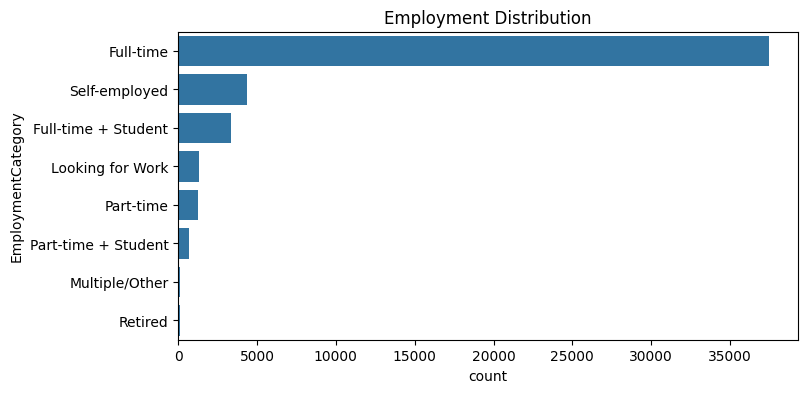

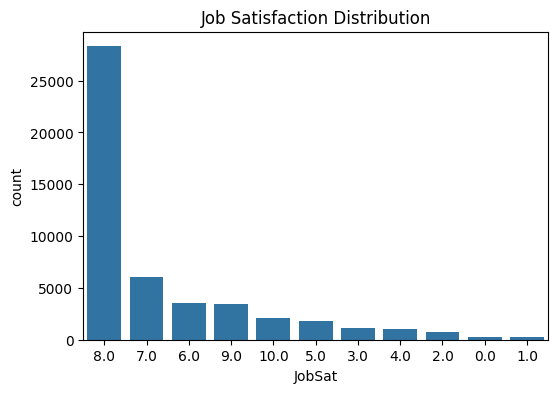

In [5]:
#Understanding the Distribution of the Columns 
print("Employment distribution (Percentages):")
print(df_cleaned['Employment'].value_counts(dropna=False, normalize=True).round(3) * 100)

print("\nJob Satisfaction distribution (Percentages):")
print(df_cleaned['JobSat'].value_counts(dropna=False, normalize=True).round(3) * 100)

print("\nProfessional Coding Experience distribution (Percentages):")
print(df_cleaned['YearsCodePro'].value_counts(dropna=False, normalize=True).round(3) * 100)

#Including EmploymentCategory for better understanding
print("\nEmployment distribution Simple (Percentages):")
print(df_cleaned['EmploymentCategory'].value_counts(dropna=False, normalize=True).round(3) * 100)


#Adding visualizations for better understanding 
# Employment
plt.figure(figsize=(8,4))
sns.countplot(y='EmploymentCategory', data=df_cleaned, order=df_cleaned['EmploymentCategory'].value_counts().index)
plt.title("Employment Distribution")
plt.show()

# Job Satisfaction
plt.figure(figsize=(6,4))
sns.countplot(x='JobSat', data=df_cleaned, order=df_cleaned['JobSat'].value_counts().index)
plt.title("Job Satisfaction Distribution")
plt.show()


### Step 5: Visualize Job Satisfaction (Focus on JobSat)


- Create a pie chart or KDE plot to visualize the distribution of `JobSat`.

- Provide an interpretation of the plot, highlighting key trends in job satisfaction.


Remaining rows after dropping NaNs: 48704


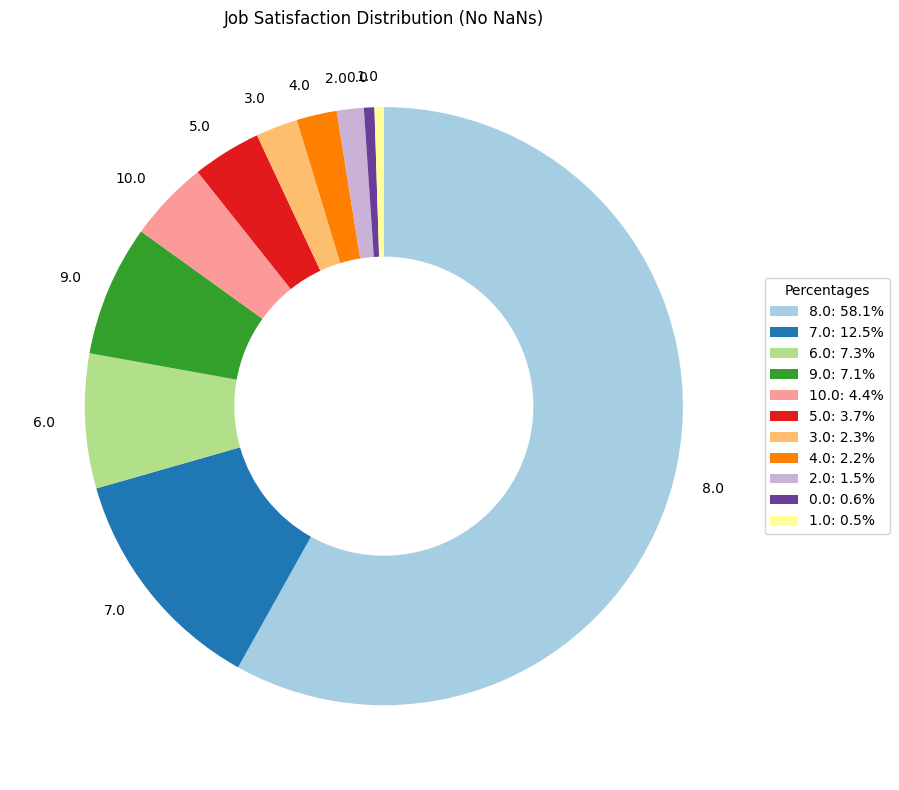

The majority of responses (around 70%) were 7 or 8, indicating a generally high level of job satisfaction. Scores of 6 and 9 were nearly equally represented, each accounting for about 7%. Approximately 10% of respondents reported 5 or below, reflecting a small group of dissatisfied workers, while only 4% gave a perfect 10, highlighting that truly exceptional satisfaction is rare. Overall, the distribution forms a slightly skewed normal curve centered just below 8, suggesting that most respondents are satisfied, but there is a small tail of both lower and higher satisfaction scores.


In [6]:
# Drop rows where JobSat is NaN
df_job_sat = df_cleaned.dropna(subset=['JobSat'])

# Check the remaining shape
print("Remaining rows after dropping NaNs:", df_job_sat.shape[0])

# Count responses again
job_sat_counts = df_job_sat['JobSat'].value_counts()


# Custom autopct function that returns empty (we'll put percentages separately)
def make_autopct(pct):
    return ''  # keep slices clean

# Colors for slices
colors = plt.cm.Paired.colors[:len(job_sat_counts)]

# Create pie chart
plt.figure(figsize=(10, 8))
wedges, texts, autotexts = plt.pie(
    job_sat_counts,
    labels=job_sat_counts.index,   # category labels stay on slices
    autopct=make_autopct,
    startangle=90,
    counterclock=False,
    colors=colors,
    wedgeprops=dict(width=0.5)  # optional: make donut for aesthetics
)

# Add percentages outside using legend-style approach
total = sum(job_sat_counts)
percent_labels = [f"{label}: {count/total*100:.1f}%" for label, count in zip(job_sat_counts.index, job_sat_counts)]
plt.legend(percent_labels, title="Percentages", bbox_to_anchor=(1, 0.5), loc="center left")

plt.title("Job Satisfaction Distribution (No NaNs)")
plt.tight_layout()
plt.show()

print("The majority of responses (around 70%) were 7 or 8, indicating a generally high level of job satisfaction. Scores of 6 and 9 were nearly equally represented, each accounting for about 7%. Approximately 10% of respondents reported 5 or below, reflecting a small group of dissatisfied workers, while only 4% gave a perfect 10, highlighting that truly exceptional satisfaction is rare. Overall, the distribution forms a slightly skewed normal curve centered just below 8, suggesting that most respondents are satisfied, but there is a small tail of both lower and higher satisfaction scores.") 

### Step 6: Programming Languages Analysis


- Compare the frequency of programming languages in `LanguageHaveWorkedWith` and `LanguageWantToWorkWith`.
  
- Visualize the overlap or differences using a Venn diagram or a grouped bar chart.


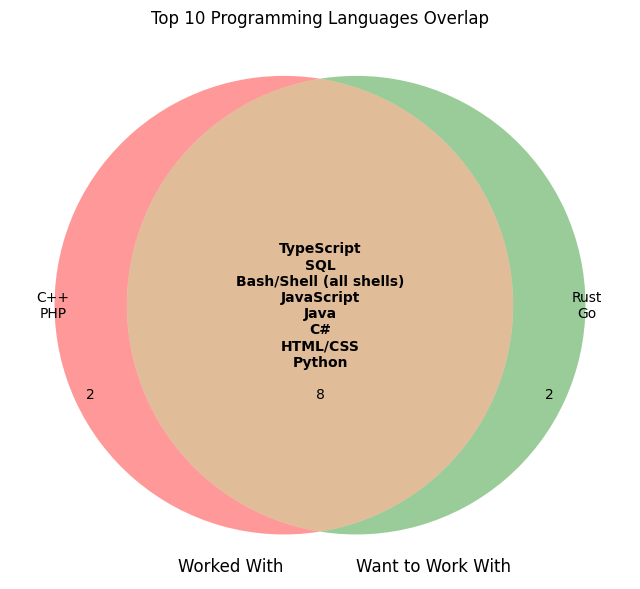

We can see that most languages fall in the intersection. However, it appears that none of the respondents have worked with Rust or Go, although some would like to. Conversely, no respondents expressed a desire to work with C++ or PHP, even though some have experience with them.


In [7]:
## Step 1 Prepare the Data
from collections import Counter

# Split semicolon-separated languages into lists
worked = df_cleaned['LanguageHaveWorkedWith'].dropna().str.split(';')
want = df_cleaned['LanguageWantToWorkWith'].dropna().str.split(';')

# Flatten lists and count frequency
worked_counter = Counter([lang for sublist in worked for lang in sublist])
want_counter = Counter([lang for sublist in want for lang in sublist])

# Convert to DataFrame for easier plotting
import pandas as pd
lang_df = pd.DataFrame({
    'WorkedWith': pd.Series(worked_counter),
    'WantToWorkWith': pd.Series(want_counter)
}).fillna(0).sort_values(by='WorkedWith', ascending=False)
lang_df

#Step 2 Venn Diagram
from matplotlib_venn import venn2
import matplotlib.pyplot as plt

# Top 10 languages for worked and want-to-work
top_worked = set(lang_df['WorkedWith'].sort_values(ascending=False).head(10).index)
top_want = set(lang_df['WantToWorkWith'].sort_values(ascending=False).head(10).index)

# Compute intersections and uniques
intersection = top_worked & top_want
only_worked = top_worked - top_want
only_want = top_want - top_worked

# Create Venn diagram
plt.figure(figsize=(8, 8))
v = venn2(subsets=(len(only_worked), len(only_want), len(intersection)), set_labels=('Worked With', 'Want to Work With'))

# Add language names inside each section
plt.text(-0.6, 0.0, "\n".join(only_worked), ha='center', va='center', fontsize=10)
plt.text(0.6, 0.0, "\n".join(only_want), ha='center', va='center', fontsize=10)
plt.text(0, 0, "\n".join(intersection), ha='center', va='center', fontsize=10, fontweight='bold')

# Move default count labels to the bottom of each circle/section
for text in v.subset_labels:
    if text:  # sometimes some subset_labels are None
        x, y = text.get_position()
        text.set_position((x, y - 0.20))  # move downward

plt.title('Top 10 Programming Languages Overlap')
plt.show()

print("We can see that most languages fall in the intersection. However, it appears that none of the respondents have worked with Rust or Go, although some would like to. Conversely, no respondents expressed a desire to work with C++ or PHP, even though some have experience with them.")

### Step 7: Analyze Remote Work Trends


- Visualize the distribution of RemoteWork by region using a grouped bar chart or heatmap.


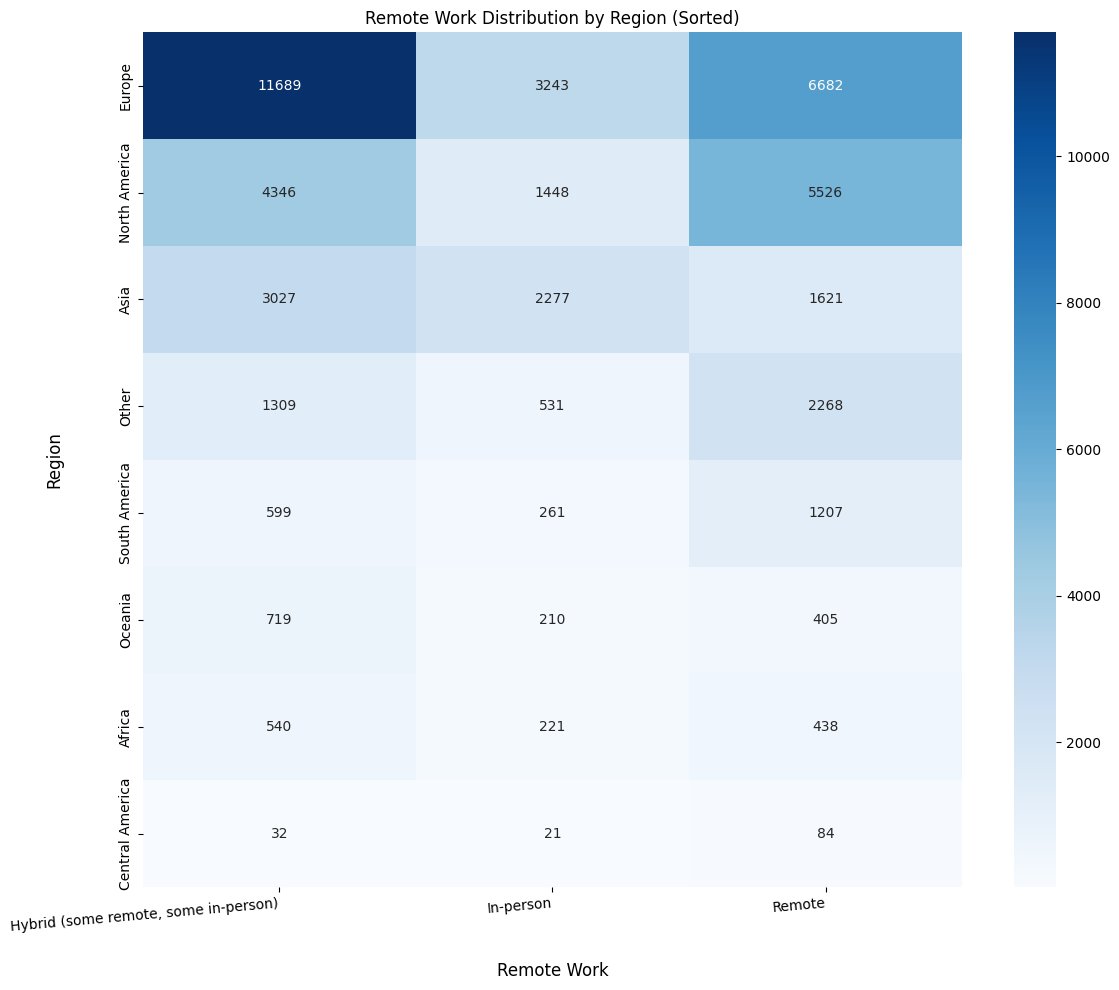

In [8]:
# Count RemoteWork by Region
remote_region = df_cleaned.groupby(['Region', 'RemoteWork']).size().reset_index(name='Count')

# Pivot table for heatmap
remote_pivot = df_cleaned.groupby(['Region', 'RemoteWork']).size().reset_index(name='Count')
remote_pivot = remote_pivot.pivot(index='Region', columns='RemoteWork', values='Count').fillna(0)

# Sort by total respondents per region
remote_pivot['Total'] = remote_pivot.sum(axis=1)
remote_pivot = remote_pivot.sort_values(by='Total', ascending=False)
remote_pivot = remote_pivot.drop(columns='Total')  # remove helper column

# Plot heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(remote_pivot, annot=True, fmt='g', cmap='Blues')

plt.title('Remote Work Distribution by Region (Sorted)')
plt.ylabel('Region', fontsize=12, labelpad=40)
plt.xlabel('Remote Work', fontsize=12, labelpad=20)  # <- move x-axis label down
plt.xticks(rotation=5, ha='right')  # rotate x-axis ticks
plt.tight_layout()
plt.show()

### Step 8: Correlation between Job Satisfaction and Experience


- Analyze the correlation between overall job satisfaction (`JobSat`) and `YearsCodePro`.
  
- Calculate the Pearson or Spearman correlation coefficient.


In [9]:
# Drop rows with missing values in JobSat or YearsCodePro
df_corr = df_cleaned[['JobSat', 'YearsCodePro']].dropna()

# Pearson correlation (linear relationship)
pearson_corr = df_corr['JobSat'].corr(df_corr['YearsCodePro'], method='pearson')

# Spearman correlation (monotonic relationship)
spearman_corr = df_corr['JobSat'].corr(df_corr['YearsCodePro'], method='spearman')

print(f"Pearson correlation: {pearson_corr:.3f}")
print(f"Spearman correlation: {spearman_corr:.3f}")


Pearson correlation: 0.076
Spearman correlation: 0.079


### Step 9: Cross-tabulation Analysis (Employment vs. Education Level)


- Analyze the relationship between employment status (`Employment`) and education level (`EdLevel`).

- **Instruction**: Create a cross-tabulation using `pd.crosstab()` and visualize it with a stacked bar plot if possible.


EmploymentCategory,Full-time,Full-time + Student,Looking for Work,Multiple/Other,Part-time,Part-time + Student,Retired,Self-employed
EdLevel,,,,,,,,
"Associate degree (A.A., A.S., etc.)",1086,108,55,1,38,24,1,130
"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",17178,1342,635,46,437,272,28,1582
"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",11313,553,322,37,410,113,25,1335
Primary/elementary school,159,40,12,4,17,12,0,47
"Professional degree (JD, MD, Ph.D, Ed.D, etc.)",2088,70,56,15,104,11,26,219
"Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)",1470,536,57,13,93,126,1,306
Some college/university study without earning a degree,3791,642,177,12,161,130,13,692
Something else,362,43,22,20,23,17,1,45


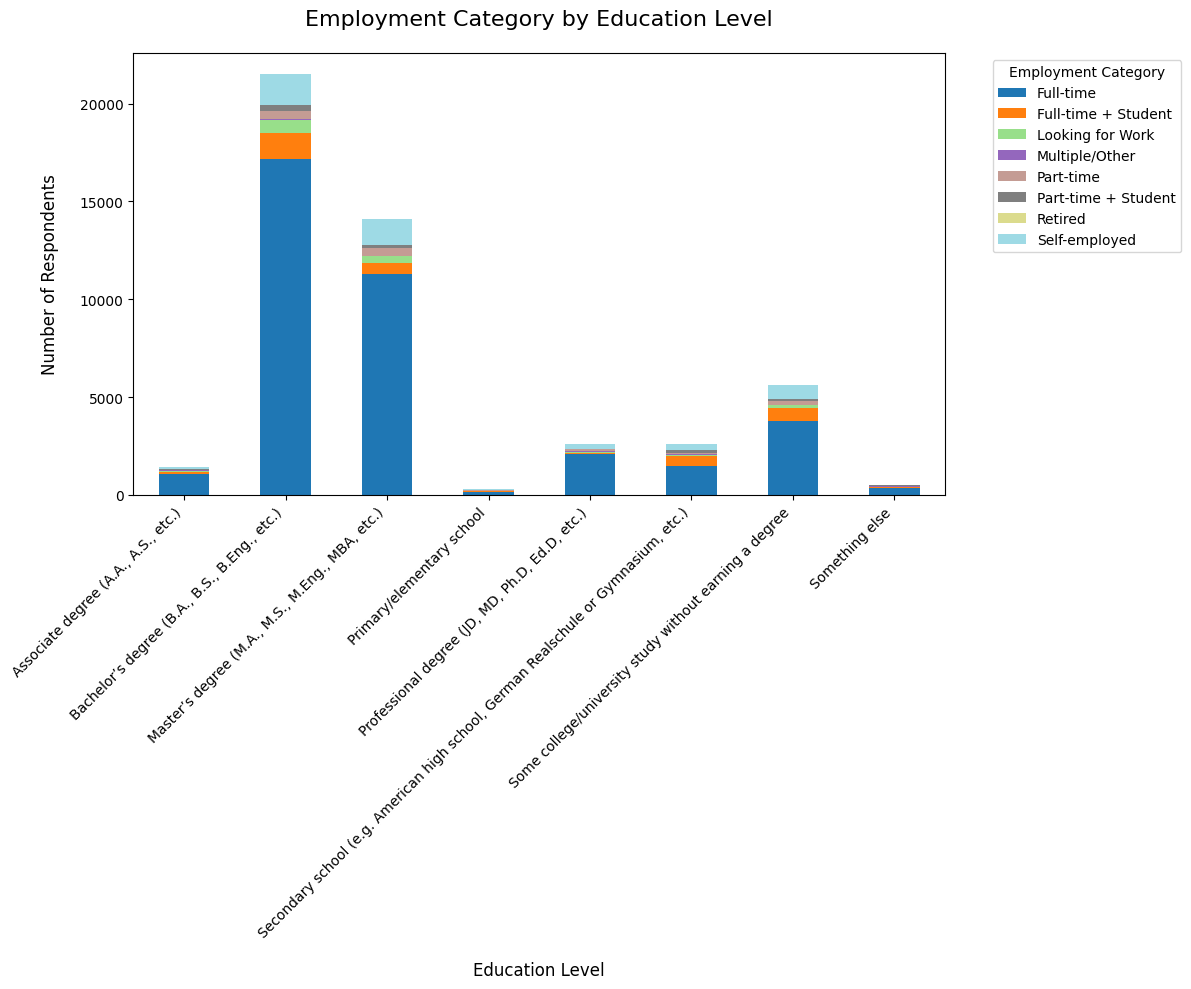

In [11]:
## For this step I'll make 2 versions: One using the original "Employment" column 
## and the other using the "EmploymentCategory" column I created.


# Cross-tabulation: counts of Employment by EdLevel
employment_edu_ct = pd.crosstab(df_cleaned['EdLevel'], df_cleaned['Employment'])

# Cross-tabulation: counts of EmploymentCategory by EdLevel
employment_cat_ct = pd.crosstab(df_cleaned['EdLevel'], df_cleaned['EmploymentCategory'])

from IPython.display import display

# Display both tables:
# display(employment_edu_ct) commenting this line for a clean output. 
display(employment_cat_ct)


# Plot stacked bar chart
employment_cat_ct.plot(
    kind='bar', 
    stacked=True, 
    figsize=(12, 10),  # taller figure
    colormap='tab20'
)

plt.title('Employment Category by Education Level', fontsize=16, pad=20)  # move title up
plt.xlabel('Education Level', fontsize=12, labelpad=15)  # move x-axis label down
plt.ylabel('Number of Respondents', fontsize=12, labelpad=15)  # move y-axis label left
plt.xticks(rotation=45, ha='right')
plt.legend(title='Employment Category', bbox_to_anchor=(1.05, 1), loc='upper left')  # move legend outside
plt.tight_layout()
plt.show()

### Step 10: Export Cleaned Data


- Save the cleaned dataset to a new CSV file for further use or sharing.


In [13]:
# Save the cleaned dataset
df_cleaned.to_csv('cleaned_data_Lab13.csv', index=False)

print("Cleaned dataset saved as 'cleaned_data_Lab13.csv'.")


Cleaned dataset saved as 'cleaned_data_Lab13.csv'.


### Summary:


In this lab, I practiced key skills in exploratory data analysis, including:


- Examining the structure and content of the Stack Overflow survey dataset to understand its variables and data types.

- Identifying and addressing missing data to ensure the dataset's quality and completeness.

- Summarizing and visualizing key variables such as job satisfaction, programming languages, and remote work trends.

- Analyzing relationships in the data using techniques like:
    - Comparing programming languages respondents have worked with versus those they want to work with.
      
    - Exploring remote work preferences by region.

- Investigating correlations between professional coding experience and job satisfaction.

- Performing cross-tabulations to analyze relationships between employment status and education levels.


## Authors:
Ayushi Jain


### Other Contributors:
Rav Ahuja
Lakshmi Holla
Malika


Copyright © IBM Corporation. All rights reserved.
